In [1]:
import tensorflow as tf
from tensorflow.keras import initializers
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray


from PIL import Image, ImageOps

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

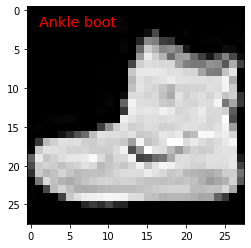

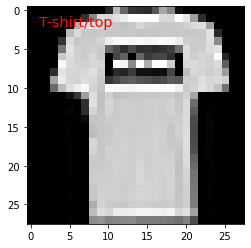

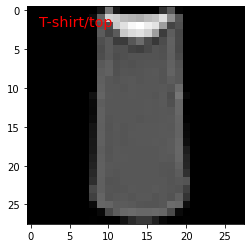

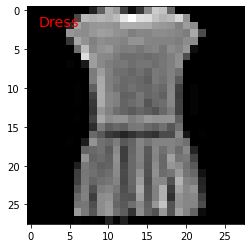

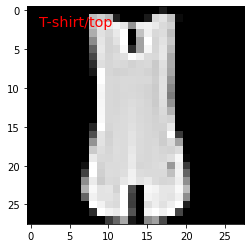

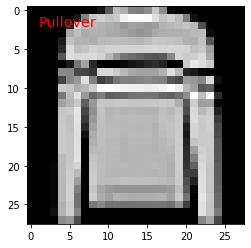

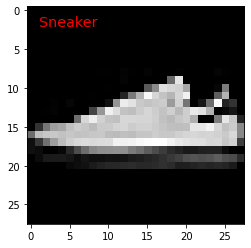

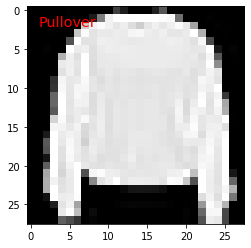

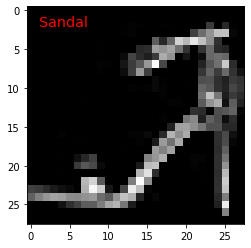

In [3]:
def read_label(label):
    if label == 0:
        return 'T-shirt/top'
    elif label == 1:
        return 'Trouser'
    elif label == 2:
        return 'Pullover'
    elif label == 3:
        return 'Dress'
    elif label == 4:
        return 'Coat'
    elif label == 5:
        return 'Sandal'
    elif label == 6:
        return 'Shirt'
    elif label == 7:
        return 'Sneaker'
    elif label == 8:
        return 'Bag'
    elif label == 9:
        return 'Ankle boot'
    
def show_images(img, label):
    plt.figure()
    plt.text(1, 2, read_label(label), color='r', size = 'x-large')
    plt.imshow(img, cmap=plt.cm.gray)

for i in range(0,9):
    show_images(x_train[i], y_train[i])

In [4]:
x_train_new = x_train.reshape(60000, 28, 28, 1)
x_test_new = x_test.reshape(10000, 28, 28, 1)

In [5]:
x_train_new.shape

(60000, 28, 28, 1)

In [6]:
x_train_new = (x_train_new - np.min(x_train_new))/np.ptp(x_train_new)
x_test_new = (x_test_new - np.min(x_test_new))/np.ptp(x_test_new)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

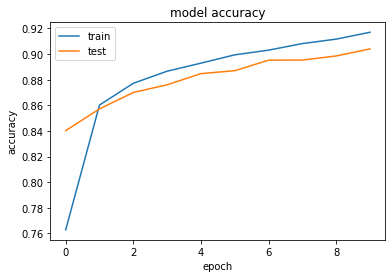

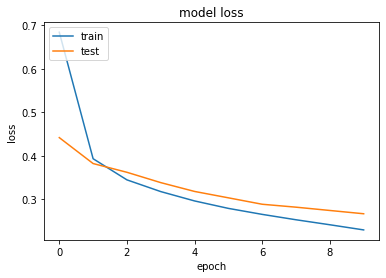

In [10]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async' 


model = Sequential()
layer_1 = layers.Conv2D(64, kernel_size=(2,2), padding="same", activation = "relu", input_shape=(28,28,1))
layer_2 = layers.MaxPooling2D(pool_size=(2), strides=(2))
layer_3 = layers.Conv2D(32, kernel_size=(2,2), padding="same", activation = "relu", input_shape=(28,28,1))
layer_4 = layers.MaxPooling2D(pool_size=(2), strides=(2))
layer_5 = layers.Flatten()
layer_6 = layers.Dense(256, activation = "relu")
layer_7 = layers.Dense(10, activation = "softmax")

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)

model.summary()

model.compile(
 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

predictions = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 500,
 validation_data = (x_test_new, y_test)
)


print("_________________________________________________________________")
print("Metrics: ")
print("Test-Accuracy:", np.mean(predictions.history["val_accuracy"]))
print("Test-Loss:", np.mean(predictions.history["val_loss"]))

#accuracy
plt.plot(predictions.history['accuracy'])
plt.plot(predictions.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#loss
plt.plot(predictions.history['loss'])
plt.plot(predictions.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Implementation of pooling

In [141]:
def pooling(img, pool_size, stride, option):
    #to store individual pools
    pools = []
    
    for i in np.arange(img.shape[0], step=stride):
        for j in np.arange(img.shape[0], step=stride):
            
            #extract the current pool
            mat = img[i:i+pool_size, j:j+pool_size]
            
            #check shape
            if mat.shape == (pool_size, pool_size):
                pools.append(mat)
                
    #list of all pools
    new_pools = np.array(pools)

    #create output shape
    num_pools = new_pools.shape[0]
    tgt_shape = (int(np.sqrt(num_pools)), int(np.sqrt(num_pools)))
    
    #to store return
    pooled = []
    
    #add value according to option
    for pool in pools:
        if(option == 'max'):
            pooled.append(np.max(pool))
        if(option == 'mean'):
            pooled.append(np.mean(pool))
        
    return np.array(pooled).reshape(tgt_shape)

In [142]:
#sample numpy
matrix = np.array([[1, 1, 2, 4],
                   [5, 6, 7, 8],
                   [3, 2, 1, 0],
                   [1, 2, 3, 4]])

In [145]:
#test max pooing
print(pooling(img=matrix, pool_size=2, stride=2, option='max'))

[[6 8]
 [3 4]]


In [146]:
#test mean pooling
print(pooling(img=matrix, pool_size=2, stride=2, option='mean'))

[[3.25 5.25]
 [2.   2.  ]]


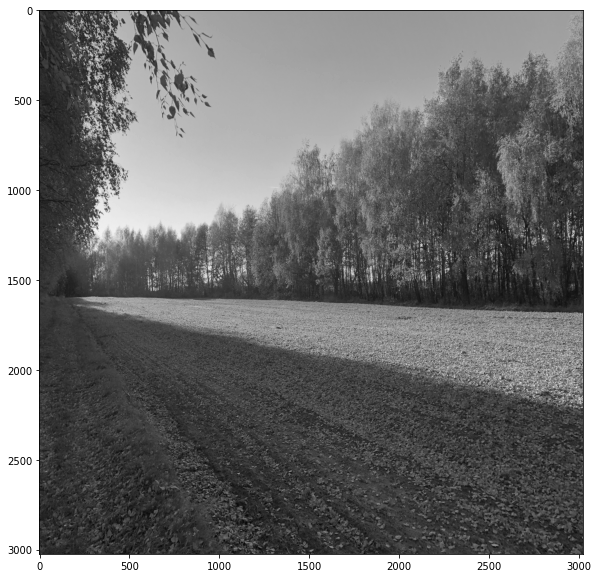

In [148]:
#load sample img
img = Image.open('IMG-0081.jpg')
img = ImageOps.grayscale(img)
img = img.resize(size=(3024, 3024)) #scale to rectangular img
fig = plt.figure(figsize=(10, 10)) 
plt.imshow(img, cmap=plt.cm.gray)

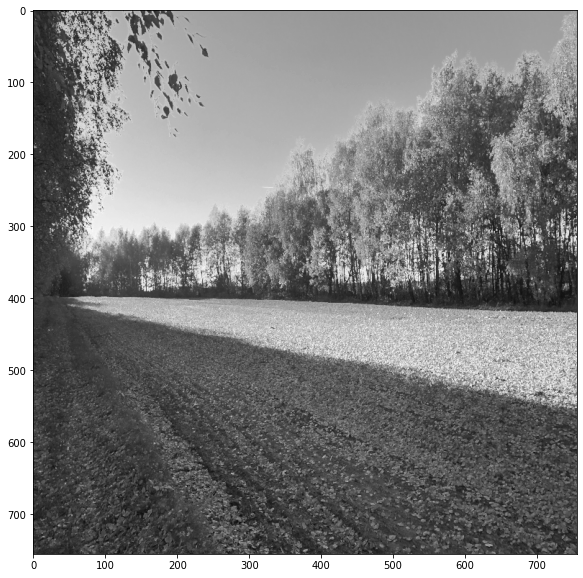

In [153]:
#test max pooing on img
new_img = pooling(img=np.array(img), pool_size=4, stride=4, option='max')
fig = plt.figure(figsize=(10, 10)) 
plt.imshow(new_img, cmap=plt.cm.gray)

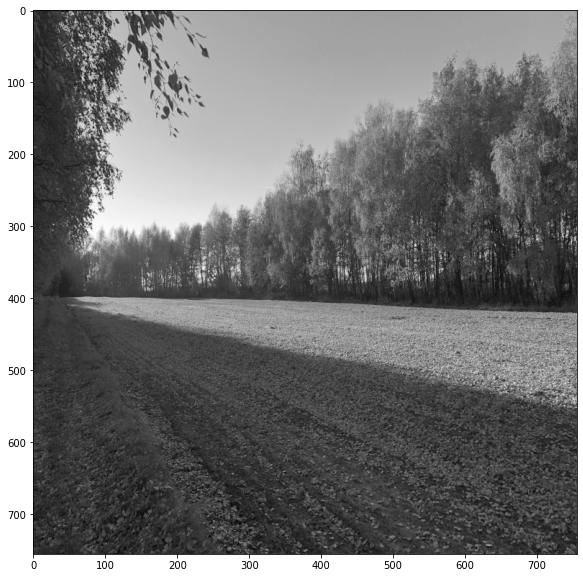

In [154]:
#test mean pooing on img
new_img = pooling(img=np.array(img), pool_size=4, stride=4, option='mean')
fig = plt.figure(figsize=(10, 10)) 
plt.imshow(new_img, cmap=plt.cm.gray)